<a href="https://colab.research.google.com/github/JacobDaleOlguin/TensorFlowShippingModel-AI-/blob/main/shipping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hopefully this is easy enough to follow



Imports

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, accuracy_score

In [6]:
url = '/content/CSV2CanUsClean.csv'
data = pd.read_csv(url)

In [7]:
print(data.head())
print(data.shape)

         AREA AREA2                  ORIGIN                     POL CARRIER  \
0  BANGLADESH   SEA  CHITTAGONG, BANGLADESH  CHATTOGRAM, BANGLADESH     EMC   
1  BANGLADESH   SEA  CHITTAGONG, BANGLADESH  CHATTOGRAM, BANGLADESH     EMC   
2  BANGLADESH   SEA  CHITTAGONG, BANGLADESH  CHATTOGRAM, BANGLADESH     EMC   
3  BANGLADESH   SEA  CHITTAGONG, BANGLADESH  CHATTOGRAM, BANGLADESH     EMC   
4  BANGLADESH   SEA  CHITTAGONG, BANGLADESH  CHATTOGRAM, BANGLADESH     EMC   

         DESTINATION  SERVICE     MODE  20'GP  40'GP  40'HQ  45'HQ  \
0  PRINCE RUPERT, BC    LOCAL    CY/CY  3,227  4,007  4,007  5,045   
1      VANCOUVER, BC    LOCAL    CY/CY  3,227  4,007  4,007  5,045   
2        CALGARY, AB  MLB/IPI  CY/RAMP  4,057  4,607  4,607    NaN   
3       EDMONTON, AB  MLB/IPI  CY/RAMP  4,057  4,607  4,607    NaN   
4       EDMONTON, AB  MLB/IPI  CY/RAMP  4,057  4,607  4,607    NaN   

                                           COMMODITY EFFECTIVE DATE     GROUP  
0  STRAIGHT OR MIXED LOA

In [8]:
price_columns = ['20\'GP', '40\'GP', '40\'HQ', '45\'HQ']
categorical_columns = ['AREA', 'AREA2', 'ORIGIN', 'POL', 'CARRIER', 'DESTINATION', 'SERVICE', 'MODE',  'COMMODITY','EFFECTIVE DATE', 'GROUP']
for column in price_columns:
    data[column + '_available'] = data[column].notna().astype(int)

In [9]:
for column in price_columns:
    data[column] = data[column].replace(',', '', regex=True).astype(float)
'''print(data.head(23))'''

'print(data.head(23))'

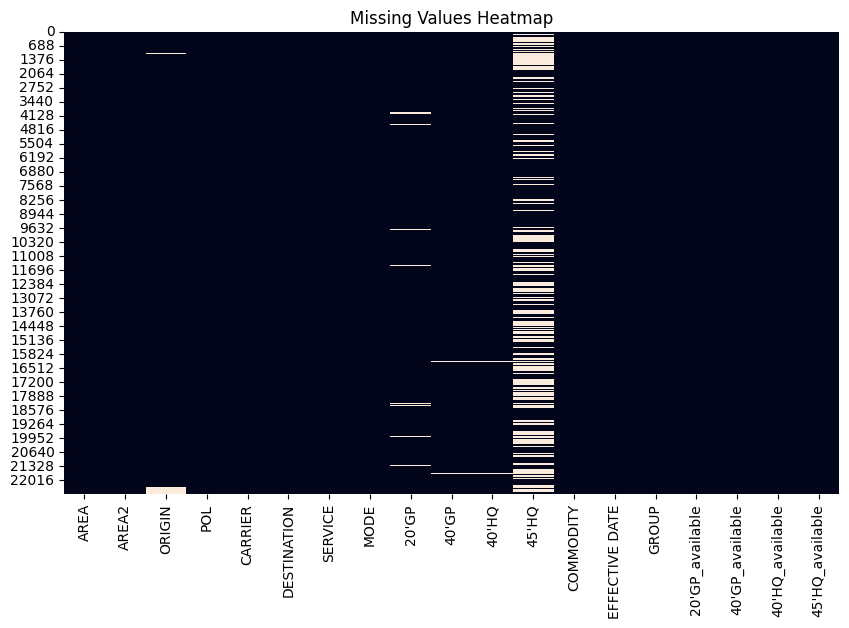

In [10]:
plt.figure(figsize=(10, 6))
plt.title('Missing Values Heatmap')
sns.heatmap(data.isnull(), cbar=False)
plt.show()

In [11]:
# Calculates the average ratio between '45'HQ' and '40'HQ' where both are available
valid_data = data.dropna(subset=['40\'HQ', '45\'HQ'])
ratio = (valid_data['45\'HQ'] / valid_data['40\'HQ']).mean()

# Apply the averaged ratio to impute missing '45'HQ' values based on '40'HQ' values
data.loc[data['45\'HQ'].isna() & data['40\'HQ'].notna(), '45\'HQ'] = data['40\'HQ'] * ratio

# Handles the rest of the missing values in '40'HQ' and '45\'HQ' with mean imputation
imputer = SimpleImputer(strategy='mean')
data[['40\'HQ', '45\'HQ']] = imputer.fit_transform(data[['40\'HQ', '45\'HQ']])

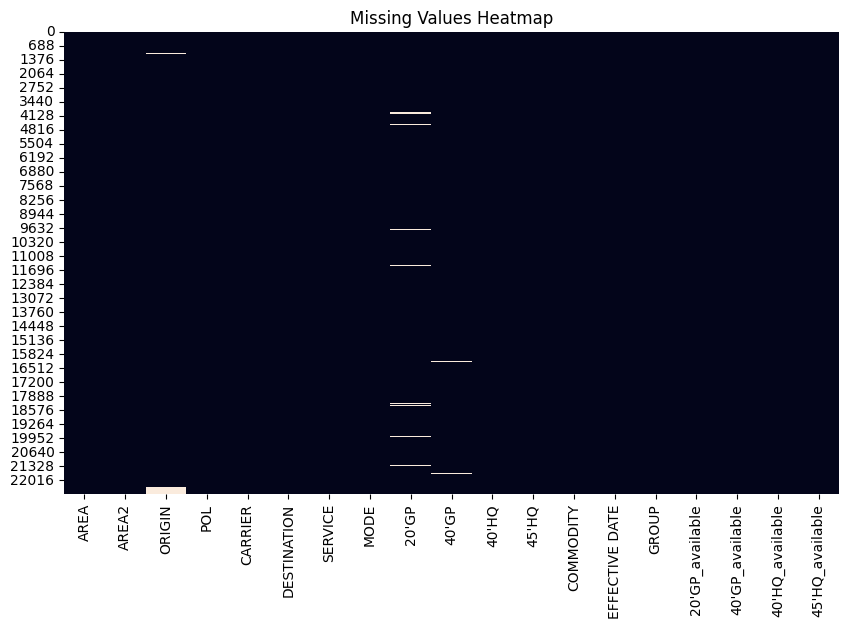

In [12]:
plt.figure(figsize=(10, 6))
plt.title('Missing Values Heatmap')
sns.heatmap(data.isnull(), cbar=False)
plt.show()

In [13]:
print(data.iloc[13800:13810, :])

           AREA AREA2            ORIGIN               POL CARRIER  \
13800  MALAYSIA   SEA  PENANG, MALAYSIA  PENANG, MALAYSIA     EMC   
13801  MALAYSIA   SEA  PENANG, MALAYSIA  PENANG, MALAYSIA     ZIM   
13802  MALAYSIA   SEA  PENANG, MALAYSIA  PENANG, MALAYSIA     ZIM   
13803  MALAYSIA   SEA  PENANG, MALAYSIA  PENANG, MALAYSIA     EMC   
13804  MALAYSIA   SEA  PENANG, MALAYSIA  PENANG, MALAYSIA     MSC   
13805  MALAYSIA   SEA  PENANG, MALAYSIA  PENANG, MALAYSIA     EMC   
13806  MALAYSIA   SEA  PENANG, MALAYSIA  PENANG, MALAYSIA     EMC   
13807  MALAYSIA   SEA  PENANG, MALAYSIA  PENANG, MALAYSIA     EMC   
13808  MALAYSIA   SEA  PENANG, MALAYSIA  PENANG, MALAYSIA     EMC   
13809  MALAYSIA   SEA  PENANG, MALAYSIA  PENANG, MALAYSIA     ZIM   

              DESTINATION   SERVICE     MODE   20'GP   40'GP   40'HQ  \
13800           OMAHA, NE   MLB/IPI  CY/RAMP  5997.0  6662.0  6662.0   
13801           OMAHA, NE  AWR/RIPI  CY/RAMP  7871.0  8717.0  8717.0   
13802      PITTSBURGH, P

Next part is...dense (ML pun, nice) and will show how the categorical data is being reworked to be more understandable for the model

In [14]:
imputer = SimpleImputer(strategy='mean')
data[['20\'GP', '40\'GP']] = imputer.fit_transform(data[['20\'GP', '40\'GP']])

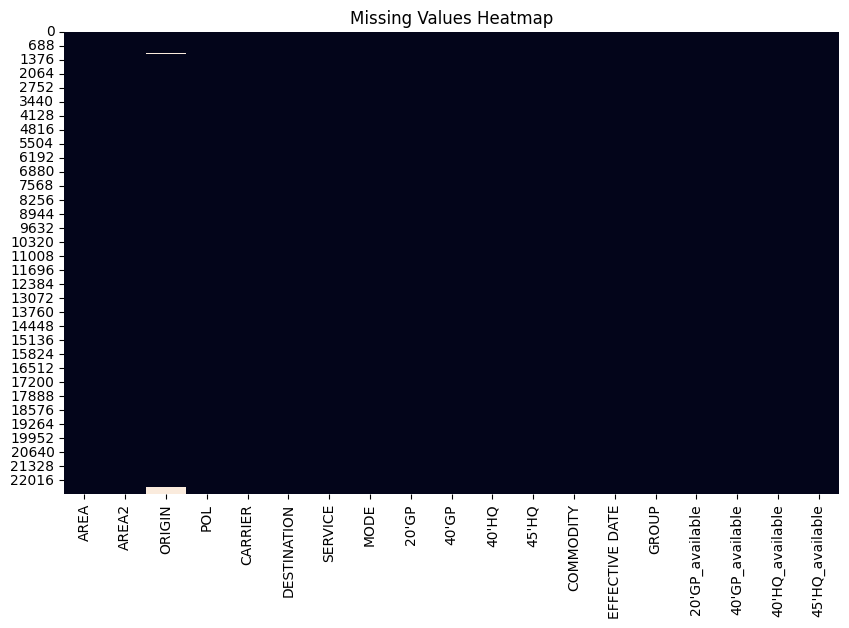

In [15]:
plt.figure(figsize=(10, 6))
plt.title('Missing Values Heatmap')
sns.heatmap(data.isnull(), cbar=False)
plt.show()

In [16]:
# Encoding categorical variables
encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(data[categorical_columns])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))
data = data.join(encoded_df).drop(columns=categorical_columns)

# Display the first few rows of the encoded DataFrame
print("Encoded Data Preview:")
print(encoded_df.head())


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Encoded Data Preview:
   AREA_BANGLADESH  AREA_CAMBODIA  AREA_CHINA  AREA_HONG KONG  AREA_INDIA  \
0              1.0            0.0         0.0             0.0         0.0   
1              1.0            0.0         0.0             0.0         0.0   
2              1.0            0.0         0.0             0.0         0.0   
3              1.0            0.0         0.0             0.0         0.0   
4              1.0            0.0         0.0             0.0         0.0   

   AREA_INDONESIA  AREA_JAPAN  AREA_KOREA  AREA_MALAYSIA  AREA_PAKISTAN  ...  \
0             0.0         0.0         0.0            0.0            0.0  ...   
1             0.0         0.0         0.0            0.0            0.0  ...   
2             0.0         0.0         0.0            0.0            0.0  ...   
3             0.0         0.0         0.0            0.0            0.0  ...   
4             0.0         0.0         0.0            0.0            0.0  ...   

   GROUP_PS6  GROUP_PS7  GROUP_PSX

In [17]:
print(data.drop(columns=['20\'GP', '40\'GP', '40\'HQ', '45\'HQ'] + [col + '_available' for col in ['20\'GP', '40\'GP', '40\'HQ', '45\'HQ']]).head)
data.dropna(inplace=True)
print(data.drop(columns=['20\'GP', '40\'GP', '40\'HQ', '45\'HQ'] + [col + '_available' for col in ['20\'GP', '40\'GP', '40\'HQ', '45\'HQ']]).head)


<bound method NDFrame.head of        AREA_BANGLADESH  AREA_CAMBODIA  AREA_CHINA  AREA_HONG KONG  AREA_INDIA  \
0                  1.0            0.0         0.0             0.0         0.0   
1                  1.0            0.0         0.0             0.0         0.0   
2                  1.0            0.0         0.0             0.0         0.0   
3                  1.0            0.0         0.0             0.0         0.0   
4                  1.0            0.0         0.0             0.0         0.0   
...                ...            ...         ...             ...         ...   
22677              0.0            0.0         0.0             0.0         1.0   
22678              0.0            0.0         0.0             0.0         1.0   
22679              0.0            0.0         0.0             0.0         1.0   
22680              0.0            0.0         0.0             0.0         1.0   
22681              0.0            0.0         0.0             0.0         1.0  

In [18]:
X = data.drop(columns=['20\'GP', '40\'GP', '40\'HQ', '45\'HQ'] + [col + '_available' for col in ['20\'GP', '40\'GP', '40\'HQ', '45\'HQ']])
y_price = data[['20\'GP', '40\'GP', '40\'HQ', '45\'HQ']]
y_available = data[[col + '_available' for col in ['20\'GP', '40\'GP', '40\'HQ', '45\'HQ']]]

X_train, X_test, y_train_price, y_test_price, y_train_available, y_test_available = train_test_split(X, y_price, y_available, test_size=0.2, random_state=42)

In [19]:
# Set up the Random Forest models
price_model = RandomForestRegressor(n_estimators=100, random_state=42)
availability_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [20]:
# Train the models
price_model.fit(X_train, y_train_price)
availability_model.fit(X_train, y_train_available)

RandomForestClassifier(random_state=42)

In [21]:
# Make predictions and evaluate
y_pred_price = price_model.predict(X_test)
y_pred_available = availability_model.predict(X_test)


In [22]:
# Calculate accuracy for availability and mean squared error for price predictions
from sklearn.metrics import mean_squared_error, accuracy_score
print("MSE for Price Prediction:", mean_squared_error(y_test_price, y_pred_price))
print("Accuracy for Availability Prediction:", accuracy_score(y_test_available, y_pred_available))

MSE for Price Prediction: 40502.778099907155
Accuracy for Availability Prediction: 0.9850121225479391


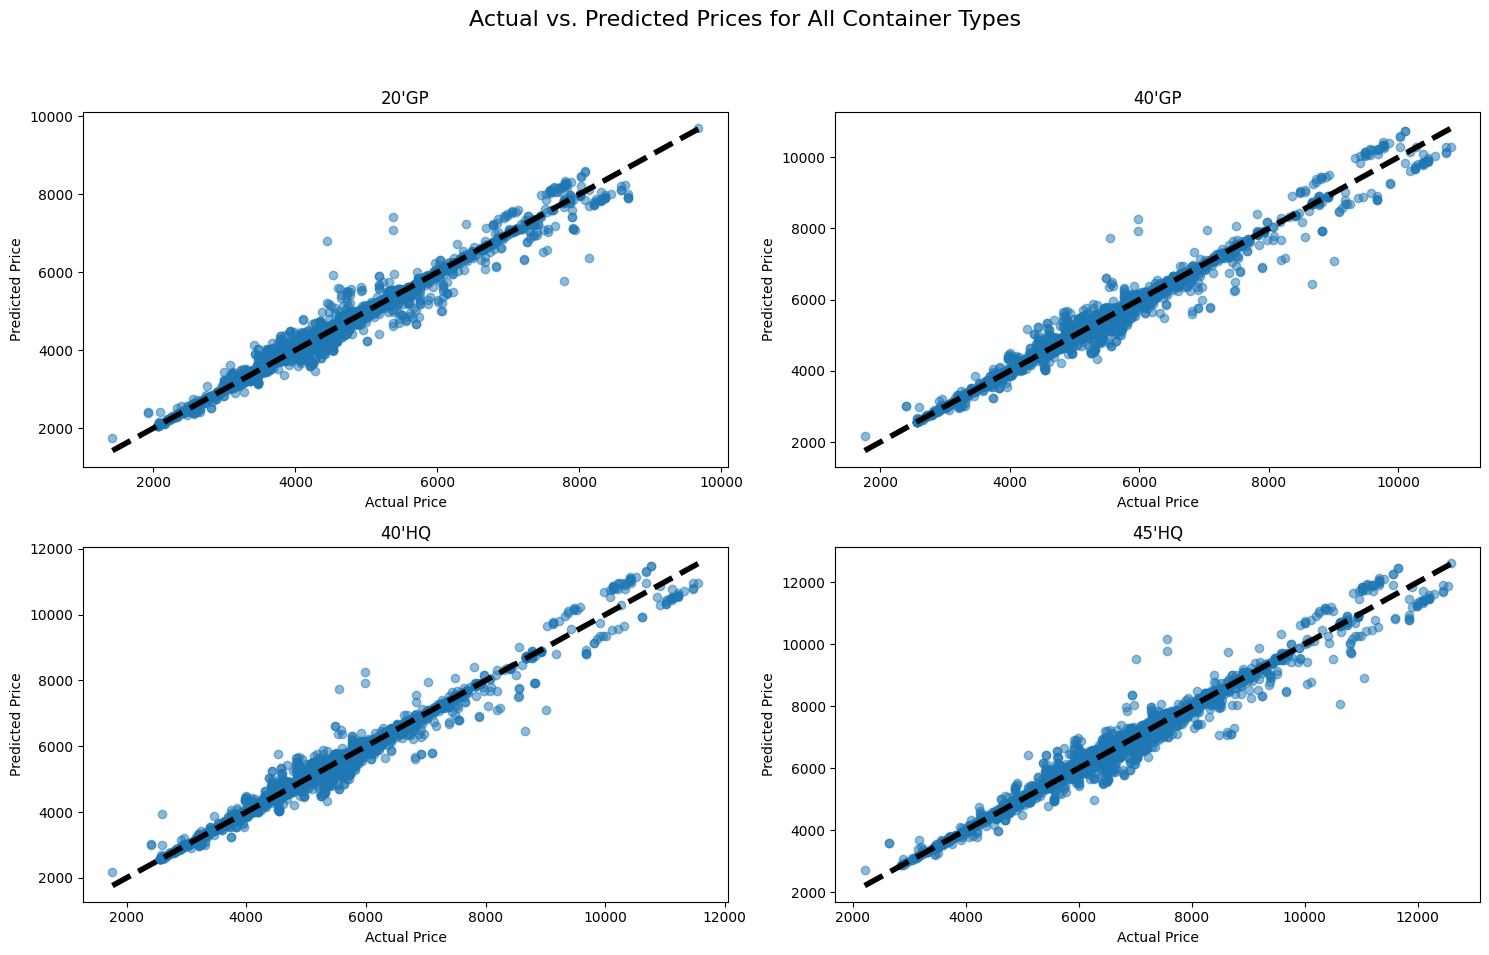

In [23]:
# Assuming 'y_pred_price' is your predictions array and 'y_test_price' contains the actual values
container_types = ['20\'GP', '40\'GP', '40\'HQ', '45\'HQ']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.suptitle('Actual vs. Predicted Prices for All Container Types', fontsize=16)

for i, container in enumerate(container_types):
    ax = axes[i//2, i%2]  # Determine subplot position
    y_test_array = y_test_price[container].values  # Actual values
    y_pred_array = y_pred_price[:, i]  # Predictions (assuming order in 'y_pred_price' matches 'container_types')

    ax.scatter(y_test_array, y_pred_array, alpha=0.5)
    ax.plot([y_test_array.min(), y_test_array.max()], [y_test_array.min(), y_test_array.max()], 'k--', lw=4)
    ax.set_xlabel('Actual Price')
    ax.set_ylabel('Predicted Price')
    ax.set_title(f'{container}')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


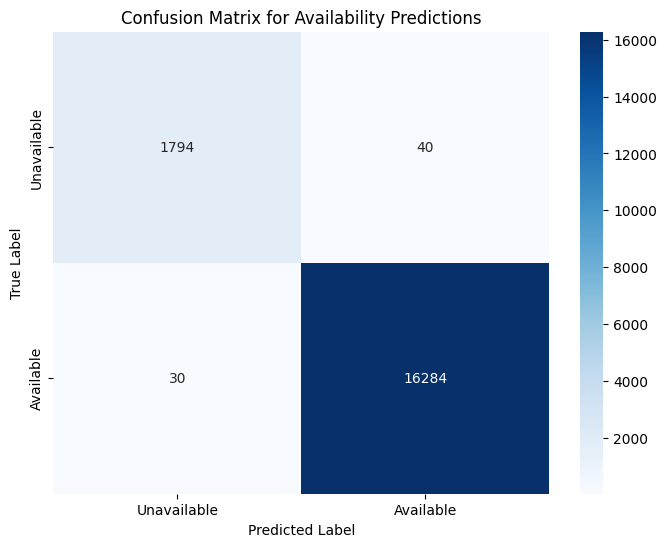

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Flatten the y_test_available and y_pred_available arrays
y_test_available_flattened = y_test_available.values.flatten()
y_pred_available_flattened = y_pred_available.flatten()

# Generate the confusion matrix
cm = confusion_matrix(y_test_available_flattened, y_pred_available_flattened)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Unavailable', 'Available'], yticklabels=['Unavailable', 'Available'])
plt.title('Confusion Matrix for Availability Predictions')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [25]:
from joblib import dump

# Save the model to a file
dump(price_model, 'price_model.joblib')
dump(availability_model, 'availability_model.joblib')

['availability_model.joblib']

In [26]:
from google.colab import files

# Trigger the download process
files.download('price_model.joblib')
files.download('availability_model.joblib')

"files.download('price_model.joblib')\nfiles.download('availability_model.joblib')"

In [27]:
print(data.shape)

(22682, 373)
